In [2]:
import pandas as pd
#라이브러리ㄹ=는 외부에다가 편리한기능들을 다모아논거라 불ㄹ줘야함
# pandas 라이브러리 import

# series 생성 
 #### 판다스는 시리즈랑 데이터프레임 객체들을 지원

In [8]:
population = pd.Series([9904312, 3448737, 2890451, 2466052])

In [9]:
population

0    9904312
1    3448737
2    2890451
3    2466052
dtype: int64

In [10]:
population = pd.Series([9904312, 3448737, 2890451, 2466052],index = ['서울','부산','인천','대구'])

In [11]:
population

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

#### Series 데이터 확인
- index : 인덱스 확인
- values : 값 확인
- dtype : 데이터 타입 확인

In [12]:
population.index

Index(['서울', '부산', '인천', '대구'], dtype='object')

In [13]:
population.values

array([9904312, 3448737, 2890451, 2466052], dtype=int64)

In [14]:
population.dtype

dtype('int64')

#### Series 이름 지정
- name
- index.name

In [17]:
# Series에 이름 지정하기
population.name='인구'

In [18]:
population

서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [19]:
#인덱스에 이름지정
population.index.name = '도시'

In [20]:
population.name

'인구'

In [21]:
population.index.name

'도시'

# population 실습

In [10]:
# read_csv('파일명.확장자')
# 인코딩방식을 불러올수있는 encoding='인코딩방식'
# 컬럼으로 인덱스 지정하기 index_col =''

population_number = pd.read_csv('population_number.csv',encoding='euc-kr',index_col = '도시')

In [13]:
#값으로 인덱싱해서 2015가 들어간값 가져오기
# 각각의 값이 나온 횟수를 세어주는 기능(몇개인지 세어주는)
population_number['2015'].value_counts()

9904312    1
3448737    1
2890451    1
2466052    1
Name: 2015, dtype: int64

In [14]:
# 2010년 컬럼을 가지고 와서 2010년의 컬럼 값의 빈도수 세보기
# 결측치는 세지 않는다 
population_number['2010'].value_counts()

9631482.0    1
2632035.0    1
2431774.0    1
Name: 2010, dtype: int64

In [ ]:
# 정렬  ==> 오름차순을 기본으로함. 
# 내림차순은 기본값을 바꿔주면됨 ascending = false
# sort_index ; 인덱스 값을 기준으로 정렬
# sort_values : 데이터 값을 기준으로 정렬
population_number.sort_index()

In [15]:
# ascending = False -> 내림차순
population_number.sort_index(ascending = False)

,지역,2015,2010,2005,2000
도시,,,,,
인천,수도권,2890451,2632035.0,NaN,2466338
서울,수도권,9904312,9631482.0,9762546.0,9853972
부산,경상권,3448737,NaN,NaN,3655437
대구,경상권,2466052,2431774.0,2456016.0,2473990


In [19]:
#데이터 값을 기준으로 정렬
population_number['2010'].sort_values(ascending = False)


도시
서울    9631482.0
인천    2632035.0
대구    2431774.0
부산          NaN
Name: 2010, dtype: float64

In [18]:
population_number['2010'].sort_index()

도시
대구    2431774.0
부산          NaN
서울    9631482.0
인천    2632035.0
Name: 2010, dtype: float64

In [20]:
# 컬럼값을가져와서[컬럼] 하는게 아니고 전체데이터에서 정렬하기 
# by = 컬럼값
# 컬럼값의 데이터를 통해 정렬
population_number.sort_values(by = '2010')

,지역,2015,2010,2005,2000
도시,,,,,
대구,경상권,2466052,2431774.0,2456016.0,2473990
인천,수도권,2890451,2632035.0,NaN,2466338
서울,수도권,9904312,9631482.0,9762546.0,9853972
부산,경상권,3448737,NaN,NaN,3655437


In [21]:
# 여러 컬럼을 통해 정렬가능 (먼저쓴 컬럼값을 우선정렬)
population_number.sort_values(by = ['2010','지역'])

,지역,2015,2010,2005,2000
도시,,,,,
대구,경상권,2466052,2431774.0,2456016.0,2473990
인천,수도권,2890451,2632035.0,NaN,2466338
서울,수도권,9904312,9631482.0,9762546.0,9853972
부산,경상권,3448737,NaN,NaN,3655437


# score 실습

In [27]:
# score 데이터 불러오기
#판다스에 씨에스브파일을 읽어오는 pd.read_csv
# 컬럼이었던 과목을 인덱스로 지정해주는 index_col
score=pd.read_csv('score.csv',encoding='euc-kr',index_col ='과목')

In [28]:
score

,1반,2반,3반,4반
과목,,,,
파이썬,45,44,73,39
DB,76,92,45,69
자바,47,92,45,69
크롤링,92,81,85,40
Web,11,79,47,26


- 이 데이터들가지고 연산해보기


In [29]:
# sum()
# 세로방향의 데이터총합 (세로 방향의 데이터끼리 더해짐)
score.sum()
# 디폴트값(기본값)- axis=0

1반    271
2반    388
3반    295
4반    243
dtype: int64

In [32]:
# 나는 과목별로 총합을 보고싶어 -어떤과목에서 친구들이 부족한지
# 가로 방향의 데이터총합
# 엑시스는 축 축의방향 axis
# axis= 0 은 세로 axis =1은 가로 (차원에따라 숫자 늘어남)
df = score.sum(axis =1)

df

과목
파이썬    201
DB     282
자바     253
크롤링    298
Web    163
dtype: int64

In [33]:
# 과목별 총합 데이터를 df변수(dataframe)에 추가 -> '합계' 컬럼 생성
score['총합'] = df
#score['합계'] = score.sum(axis=1)

#합계 값이 너무커짐[인덱싱]

In [45]:
# 1. '1반'~'4반' 가져오기 
# 행데이터는 전부가져오고 열은 지정해줌
score.loc[:,'1반':'4반']

,1반,2반,3반,4반
과목,,,,
파이썬,45,44,73,39
DB,76,92,45,69
자바,47,92,45,69
크롤링,92,81,85,40
Web,11,79,47,26


In [46]:
# 2. 1에서 가져온 데이터로 다시 합계 컬럼 만들어보기 !
score['합계'] = score.loc[:,'1반':'4반'].sum(axis=1)
score

,1반,2반,3반,4반,총합,합계
과목,,,,,,
파이썬,45,44,73,39,201,201
DB,76,92,45,69,282,282
자바,47,92,45,69,253,253
크롤링,92,81,85,40,298,298
Web,11,79,47,26,163,163


In [ ]:
# 평균 구하기 mean
# 과목별 평균계산 -> '평균' 컬럼 생성

In [67]:
score['평균'] = score.loc[:,'1반':'4반'].mean(axis = 1)

In [68]:
score

,1반,2반,3반,4반,총합,합계,평균,반평균
과목,,,,,,,,
파이썬,45,44,73,39,201,201,50.25,50.25
DB,76,92,45,69,282,282,70.50,70.50
자바,47,92,45,69,253,253,63.25,63.25
크롤링,92,81,85,40,298,298,74.50,74.50
Web,11,79,47,26,163,163,40.75,40.75


In [70]:
# 인덱서[행]
score.loc['파이썬']

1반      45.00
2반      44.00
3반      73.00
4반      39.00
총합     201.00
합계     201.00
평균      50.25
반평균     50.25
Name: 파이썬, dtype: float64

In [73]:
# 반평균을 계산 그리고 추가
score
score.loc['반평균']= score.mean()

In [74]:
score

,1반,2반,3반,4반,총합,합계,평균,반평균
과목,,,,,,,,
파이썬,45.0,44.0,73.0,39.0,201.0,201.0,50.25,NaN
DB,76.0,92.0,45.0,69.0,282.0,282.0,70.50,NaN
자바,47.0,92.0,45.0,69.0,253.0,253.0,63.25,NaN
크롤링,92.0,81.0,85.0,40.0,298.0,298.0,74.50,NaN
Web,11.0,79.0,47.0,26.0,163.0,163.0,40.75,NaN
반평균,54.2,77.6,59.0,48.6,239.4,239.4,59.85,NaN


In [77]:
#최댓값 : max
#최소값 : min
# 기본값으로 열방향 기준으로 나옴(반별)
#과목별로 보려면 (axis=1)을 주기

In [92]:
#과목별 최댓값
score.loc[:'Web',:'4반'].max(axis=1)

과목
파이썬    73.0
DB     92.0
자바     92.0
크롤링    92.0
Web    79.0
dtype: float64

In [90]:
# 과목별 최대값과 최소값의 차이
maxArr= score.loc[:'Web',:'4반'].max(axis=1)
minArr = score.loc[:'Web',:'4반'].min(axis=1)

In [91]:
maxArr - minArr

과목
파이썬    34.0
DB     47.0
자바     47.0
크롤링    52.0
Web    68.0
dtype: float64

In [ ]:
# 함수를 만들어서 과목별 최대값과 최소값의 차이 구하기 

In [95]:
def max_min(x):  #x라는 매개변수가 들어왔을때 저걸 반환
    return x.max() - x.min()

In [96]:
# apply 변환 - 내가만든 함수를 적용시킬때 
# 행이나 열 단위로 더 복잡한 처리를 할 때 사용
#pandas 객체(시리즈랑 데이터프레임 말함)에 함수를 적용하는 방법

#score.loc[:'Web',:'4반']   # 요 데이터에 함수를 적용시킬거임
score.loc[:'Web',:'4반'].apply(max_min,axis = 1)

과목
파이썬    34.0
DB     47.0
자바     47.0
크롤링    52.0
Web    68.0
dtype: float64

### 카테고리 생성하기

In [100]:
#데이터
ages = [0,2,10,21,23,26,38,31,61,20,41,52,100,86,85,19,18,64,99]
#구간  -> 초과 ~이하
#1 ~15 / 16~35/ 36~60/ 61~99   -> 범위안에없으면 결측치로나옴
bins = [0,15,25,35,60,99]
#이름
labels = ['미성년자','청년','중년','장년','노년']

In [102]:
#판다스에있는걸 잘라줄거에요(판다스에있는 cut함수이용)
#구간별로 자르는 
cats = pd.cut(ages,bins,labels = labels)

In [103]:
# 값들의 갯수를 세어주는 value_count ( 각 항목별 갯수 확인)
cats.value_counts()

미성년자    2
청년      5
중년      2
장년      3
노년      5
dtype: int64

In [105]:
# 이걸 표를통해 나타내기(데이터프레임 사용)
#판다스에 있는 데이터프레임사용 ---판다스가 데이터프레임 기능있음
age =pd.DataFrame(ages,columns =['나이'])
# '나이'를 age변수에 담기


In [107]:
# 연령대 컬럼 추가
age['연령대'] = cats

In [108]:
age

,나이,연령대
0,0,NaN
1,2,미성년자
2,10,미성년자
3,21,청년
4,23,청년
5,26,중년
6,38,장년
7,31,중년
8,61,노년
9,20,청년


# DataFrame 병합
- concat
- merge

In [7]:
# 데이터 생성
df1 = pd.DataFrame({'A':['A0','A1','A2','A3',],
              'B':['B0','B1','B2','B3'],
              'C':['C0','C1','C2','C3'],
              'D':['D0','D1','D2','D3'],
              },index = [0,1,2,3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])


In [6]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [8]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [9]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [10]:
pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [13]:
#concat, 디폴트값 -> axis=0
pd.concat([df1,df2,df3],axis=0)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [14]:
#concat, axis=1
pd.concat([df1,df2,df3],axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


In [16]:
df4 = pd.DataFrame({'B':['B2','B3','B6','B7'],
             'D':['D2','D3','D6','D7'],
             'F':['F2','F3','F6','F7']},
            index= [2,3,6,7])
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [17]:
# axis =0
pd.concat([df1,df4])

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [18]:
pd.concat([df1,df4],axis=1)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [20]:
# concat의 join 속성 - 병합하는 방식 지정 (어떻게 합칠지)
# outer join : 합집합, 기본값 (전부다 반환)
# inner Join : 교집합, 합치는 데이터들이 동일하게 가지고 있는 기준만 출력
pd.concat([df1,df4],axis=1,join= 'outer')

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


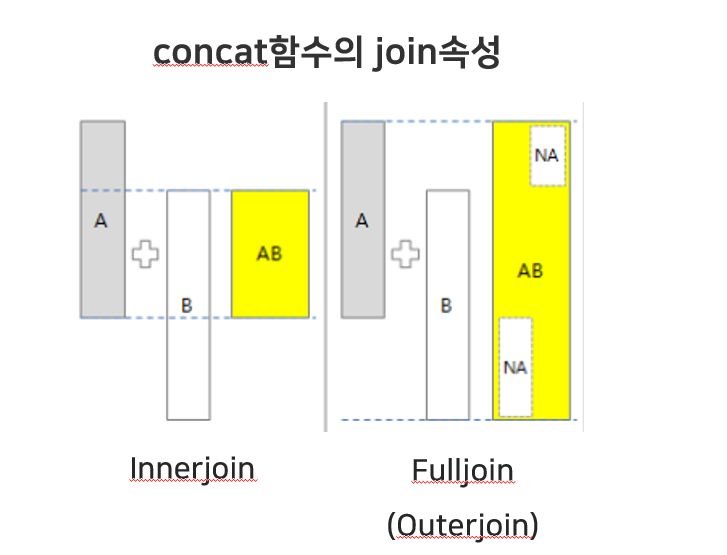

In [21]:
pd.concat([df1,df4],axis=1, join='inner')

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [22]:
pd.concat([df1,df4],axis=0, join='inner')

,B,D
0,B0,D0
1,B1,D1
2,B2,D2
3,B3,D3
2,B2,D2
3,B3,D3
6,B6,D6
7,B7,D7


In [ ]:
# merge - 데이터를 병합할건데 함수가 두개에요
# 공통된 데이터!!를 기준으로 데이터를 합침 (어떤 컬럼으로 기준으로하면 그 컬럼안에있는 데이터를 기준-ex)key랑 겹치는 데이터만 합치겟다@)

In [23]:
df5 = pd.DataFrame({'key':['K0','K2','K3','K4'],
             'A':['A0','A1','A2','A3'],
             'B':['B0','B1','B2','B3']})
df6 = pd.DataFrame({'key':['K0','K1','K2','K3'],
             'C':['C0','C1','C2','C3'],
             'D':['D0','D1','D2','D3']})


In [24]:
df6

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [25]:
# merge의 속성 on - 합칠 기준컬럼 지정
pd.merge(df5,df6,on='key') #on설정을통해서 key컬럼을 기준으로 합치겠다
#먄약 서로다른데이터가있음 상가정보데이터가있는데 한쪽에는 주소정보 한쪽에는뭐파느지 뭘ㅇㅇ
#그래서 같은 컬럼으로 합치면 한번에 볼수있음 유용

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A1,B1,C2,D2
2,K3,A2,B2,C3,D3


In [ ]:
# merge의 속성 how
# 병합의 방식 지정
# concat의 join과 동일
# 마찬가지로 outer, inner 있음
#inner : 교집합, 기본값
#(두가지 데이터 프레임까지만 더할 수 있음. concat은 리스트안에넣어서 여러개합칠수있음)

#right : 오른쪽 즉 나중에 적은 데이터가 기준
#left : 왼쪽, 먼저 적은 데이터가 기준

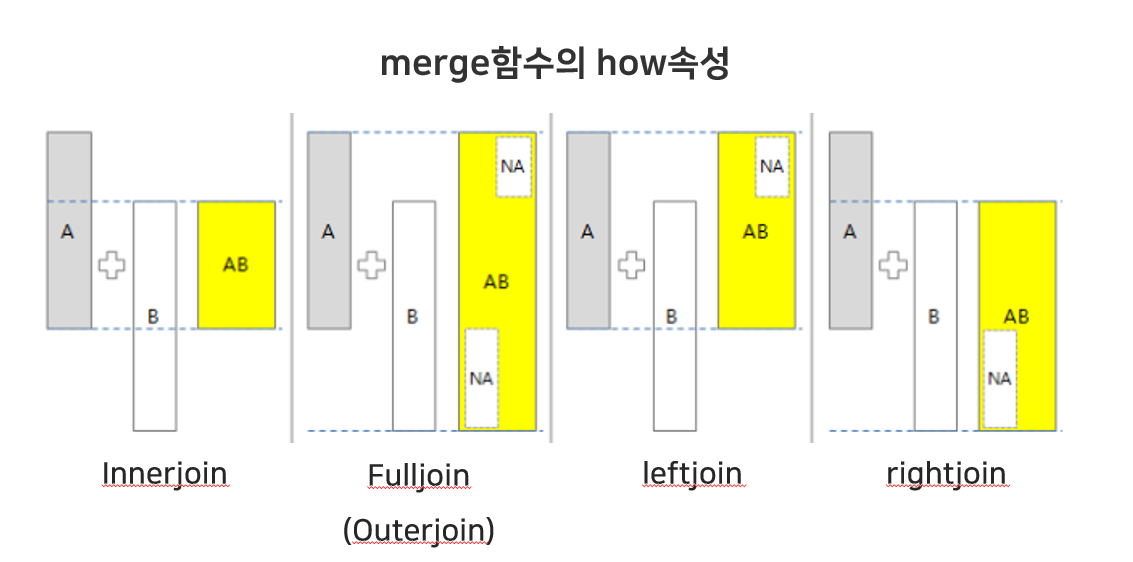

In [26]:
#inner
pd.merge(df5,df6,how = 'inner')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A1,B1,C2,D2
2,K3,A2,B2,C3,D3


In [28]:
#outer
pd.merge(df5, df6, how ='outer')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A1,B1,C2,D2
2,K3,A2,B2,C3,D3
3,K4,A3,B3,NaN,NaN
4,K1,NaN,NaN,C1,D1


In [ ]:
pd.merge(df5,df6,how='right')
#오른쪽에 적힌 df6가 기준, df6를 전부 넣고 df5를 거기에 추가 

In [30]:
df = pd.merge(df5,df6,how='left')
#df5 0,2,3,4가 기준이라 무조건 나오고 그 뒤에 df5가 있는 것들만 병합이됨)

# 데이터 프레임 삭제

In [33]:
# drop()
df.drop('D',axis =1)
#컬럼을 삭제할때는 axis 1방향으로 !
#행데이터 삭제는 axis 0방향으로 !
# axis방향잡기


,key,A,B,C
0,K0,A0,B0,C0
1,K2,A1,B1,C2
2,K3,A2,B2,C3
3,K4,A3,B3,NaN


In [34]:
# df는 삭제되어있지않음
df
#변수 이용 or inplace 속성 이용해서 변수에 담을 수 있음
#바로 적용이되지않는 이유는 삭제해버리면 메모리에 아예 삭제되서 잘못해서 복구가되지않으니 한단계 더있는것

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A1,B1,C2,D2
2,K3,A2,B2,C3,D3
3,K4,A3,B3,NaN,NaN


In [37]:
# inplace = False 가 기본값
# 변수에 결과 반영하려면 True
df.drop('D',axis =1,inplace = True)

In [38]:
df

,key,A,B,C
0,K0,A0,B0,C0
1,K2,A1,B1,C2
2,K3,A2,B2,C3
3,K4,A3,B3,NaN


# pandas최종실습
- 범죄현황 실습

In [ ]:
#데이터 로드(데이터가저오기)

In [3]:
df2015 = pd.read_csv('2015.csv',encoding='euc-kr', index_col = '관서명')



In [4]:
df2016 = pd.read_csv('2016.csv',encoding='euc-kr',index_col = '관서명')

In [5]:
df2017 = pd.read_csv('2017.csv',encoding='euc-kr',index_col = '관서명')

In [6]:
df2015

,구분,살인,강도,강간·강제추행,절도,폭력
관서명,,,,,,
광주지방경찰청계,발생건수,18,44,750,8425,9593
광주지방경찰청계,검거건수,18,47,758,5409,8301
광주지방경찰청계,검거인원,17,66,776,3433,11774
광주지방경찰청계,구속,9,33,42,104,58
광주지방경찰청계,불구속,1,26,511,2781,5618
광주지방경찰청계,기타,7,7,223,548,6098
광주동부경찰서,발생건수,3,5,92,1100,1155
광주동부경찰서,검거건수,4,6,86,583,970
광주동부경찰서,검거인원,4,7,98,447,1483


In [7]:
df2016

,구분,살인,강도,강간·강제추행,절도,폭력
관서명,,,,,,
광주지방경찰청계,발생건수,17,47,701,6052,8599
광주지방경찰청계,검거건수,18,47,713,4242,7631
광주지방경찰청계,검거인원,21,54,758,3455,10747
광주지방경찰청계,구속,14,25,37,132,57
광주지방경찰청계,불구속,3,25,491,2862,5267
광주지방경찰청계,기타,4,4,230,461,5423
광주동부경찰서,발생건수,3,8,83,832,1142
광주동부경찰서,검거건수,3,7,70,679,1002
광주동부경찰서,검거인원,4,10,71,543,1497


In [8]:
df2017

,구분,살인,강도,강간·강제추행,절도,폭력
관서명,,,,,,
광주지방경찰청계,발생건수,9,33,725,4816,8366
광주지방경찰청계,검거건수,9,32,732,3487,7553
광주지방경찰청계,검거인원,10,61,824,3046,11018
광주지방경찰청계,구속,8,28,71,115,88
광주지방경찰청계,불구속,0,26,523,2493,5235
광주지방경찰청계,기타,2,7,230,438,5695
광주지방경찰청,발생건수,0,0,0,0,0
광주지방경찰청,검거건수,0,1,91,0,37
광주지방경찰청,검거인원,0,1,105,0,149


In [9]:
# 1.df2017의 '광주지방경찰청' 데이터 삭제 
#(증감률 구해야하는데 얘는 전녀도가없어서 증감률 구할수없으니 삭제)

df2017.drop('광주지방경찰청',axis=0,inplace=True)


In [10]:
df2017

,구분,살인,강도,강간·강제추행,절도,폭력
관서명,,,,,,
광주지방경찰청계,발생건수,9,33,725,4816,8366
광주지방경찰청계,검거건수,9,32,732,3487,7553
광주지방경찰청계,검거인원,10,61,824,3046,11018
광주지방경찰청계,구속,8,28,71,115,88
광주지방경찰청계,불구속,0,26,523,2493,5235
광주지방경찰청계,기타,2,7,230,438,5695
광주동부경찰서,발생건수,3,5,77,624,1090
광주동부경찰서,검거건수,3,5,70,470,953
광주동부경찰서,검거인원,4,4,76,483,1538


In [11]:
# 2. 총 범죄발생 건수(총합)구하기
# 그리고 '총계'라는 컬럼 생성


In [12]:
df2017['총계'] = df2017.loc[:,'살인':'폭력'].sum(axis=1)

In [13]:
df2015['총계'] = df2015.loc[:,'살인':'폭력'].sum(axis=1)

In [14]:
df2016['총계'] = df2016.loc[:,'살인':'폭력'].sum(axis=1)

In [15]:
df2015

,구분,살인,강도,강간·강제추행,절도,폭력,총계
관서명,,,,,,,
광주지방경찰청계,발생건수,18,44,750,8425,9593,18830
광주지방경찰청계,검거건수,18,47,758,5409,8301,14533
광주지방경찰청계,검거인원,17,66,776,3433,11774,16066
광주지방경찰청계,구속,9,33,42,104,58,246
광주지방경찰청계,불구속,1,26,511,2781,5618,8937
광주지방경찰청계,기타,7,7,223,548,6098,6883
광주동부경찰서,발생건수,3,5,92,1100,1155,2355
광주동부경찰서,검거건수,4,6,86,583,970,1649
광주동부경찰서,검거인원,4,7,98,447,1483,2039


In [16]:
df2016

,구분,살인,강도,강간·강제추행,절도,폭력,총계
관서명,,,,,,,
광주지방경찰청계,발생건수,17,47,701,6052,8599,15416
광주지방경찰청계,검거건수,18,47,713,4242,7631,12651
광주지방경찰청계,검거인원,21,54,758,3455,10747,15035
광주지방경찰청계,구속,14,25,37,132,57,265
광주지방경찰청계,불구속,3,25,491,2862,5267,8648
광주지방경찰청계,기타,4,4,230,461,5423,6122
광주동부경찰서,발생건수,3,8,83,832,1142,2068
광주동부경찰서,검거건수,3,7,70,679,1002,1761
광주동부경찰서,검거인원,4,10,71,543,1497,2125


In [17]:
#우리에게 필요한건 발생건수! 범죄증감율이니 몇건이나 일어났는지를 봐야하닌까!
#발생건수에 해당하는 데이터들이 필요. 이것들만 가져오기!
#어떻게? 
#불리언 인덱싱 사용!

In [18]:
#3. '발생건수'에 해당하는 데이터만 필요 (가져오기! 왜나면 최종목적이 범죄 증감율 볼꺼닌까)
#3-1. '발생건수' 데이터가 있는 컬럼만 가져오기 ->컬럼인덱싱
#df2015.loc[:,:'구분']
#일차원 시리즈임
df2015['구분']

관서명
광주지방경찰청계    발생건수
광주지방경찰청계    검거건수
광주지방경찰청계    검거인원
광주지방경찰청계      구속
광주지방경찰청계     불구속
광주지방경찰청계      기타
광주동부경찰서     발생건수
광주동부경찰서     검거건수
광주동부경찰서     검거인원
광주동부경찰서       구속
광주동부경찰서      불구속
광주동부경찰서       기타
광주서부경찰서     발생건수
광주서부경찰서     검거건수
광주서부경찰서     검거인원
광주서부경찰서       구속
광주서부경찰서      불구속
광주서부경찰서       기타
광주남부경찰서     발생건수
광주남부경찰서     검거건수
광주남부경찰서     검거인원
광주남부경찰서       구속
광주남부경찰서      불구속
광주남부경찰서       기타
광주북부경찰서     발생건수
광주북부경찰서     검거건수
광주북부경찰서     검거인원
광주북부경찰서       구속
광주북부경찰서      불구속
광주북부경찰서       기타
광주광산경찰서     발생건수
광주광산경찰서     검거건수
광주광산경찰서     검거인원
광주광산경찰서       구속
광주광산경찰서      불구속
광주광산경찰서       기타
Name: 구분, dtype: object

In [19]:
#3-2. '발생건수' 데이터인지 판별
df2015['구분']=='발생건수'  #불리언값

관서명
광주지방경찰청계     True
광주지방경찰청계    False
광주지방경찰청계    False
광주지방경찰청계    False
광주지방경찰청계    False
광주지방경찰청계    False
광주동부경찰서      True
광주동부경찰서     False
광주동부경찰서     False
광주동부경찰서     False
광주동부경찰서     False
광주동부경찰서     False
광주서부경찰서      True
광주서부경찰서     False
광주서부경찰서     False
광주서부경찰서     False
광주서부경찰서     False
광주서부경찰서     False
광주남부경찰서      True
광주남부경찰서     False
광주남부경찰서     False
광주남부경찰서     False
광주남부경찰서     False
광주남부경찰서     False
광주북부경찰서      True
광주북부경찰서     False
광주북부경찰서     False
광주북부경찰서     False
광주북부경찰서     False
광주북부경찰서     False
광주광산경찰서      True
광주광산경찰서     False
광주광산경찰서     False
광주광산경찰서     False
광주광산경찰서     False
광주광산경찰서     False
Name: 구분, dtype: bool

In [20]:
#3-3. '발생건수'데이터 가져오기  #불리언을 활용한 불리언인덱싱
#df2015데이터에서 인덱싱하겠다 불리언값으로 인덱싱하겠다
df2015_crime = df2015[df2015['구분']=='발생건수']
#그리고 가져온데이터 변수에 담아주기

In [21]:
df2016_crime = df2016[df2016['구분']=='발생건수']

In [22]:
df2017_crime = df2017[df2017['구분']=='발생건수']

In [23]:
df2015_crime

,구분,살인,강도,강간·강제추행,절도,폭력,총계
관서명,,,,,,,
광주지방경찰청계,발생건수,18,44,750,8425,9593,18830
광주동부경찰서,발생건수,3,5,92,1100,1155,2355
광주서부경찰서,발생건수,5,10,172,2050,2483,4720
광주남부경찰서,발생건수,1,3,70,962,1081,2117
광주북부경찰서,발생건수,5,14,256,2570,2621,5466
광주광산경찰서,발생건수,4,12,160,1743,2253,4172


In [24]:
# 4. 총계 컬럼만 가져오기
# 컬럼 인덱싱 ----인덱싱하는[] 열기

In [25]:
t1 = df2015_crime['총계']
t2 = df2016_crime['총계']
t3 = df2017_crime['총계']

In [35]:
t1


관서명
광주지방경찰청계    18830
광주동부경찰서      2355
광주서부경찰서      4720
광주남부경찰서      2117
광주북부경찰서      5466
광주광산경찰서      4172
Name: 2015총계, dtype: int64

In [27]:
t2

관서명
광주지방경찰청계    15416
광주동부경찰서      2068
광주서부경찰서      3892
광주남부경찰서      1865
광주북부경찰서      4148
광주광산경찰서      3443
Name: 총계, dtype: int64

In [28]:
# 5.증감율 계산하기
# 범죄증감율 = (금년-작년) /작년 *100

In [29]:
# 2015~2016 증감율
s1 = (t2-t1)/t1*100
#2016~2017 증감율
s2 = (t3-t2)/t2*100

In [30]:
s1

관서명
광주지방경찰청계   -18.130643
광주동부경찰서    -12.186837
광주서부경찰서    -17.542373
광주남부경찰서    -11.903637
광주북부경찰서    -24.112697
광주광산경찰서    -17.473634
Name: 총계, dtype: float64

In [31]:
s2

관서명
광주지방경찰청계    -9.516087
광주동부경찰서    -13.007737
광주서부경찰서     -6.526208
광주남부경찰서    -17.050938
광주북부경찰서     -4.893925
광주광산경찰서    -12.285797
Name: 총계, dtype: float64

In [36]:
# (1)시리즈 이름 -> df의 컬럼이름
# 시리즈이름을 바꿔주면됨  .name = ''
t1.name ='2015총계'
t2.name='2016총계'
t3.name='2017총계'

In [ ]:
#pd.DataFrame
#우리가 지금가지고있는건 시리즈 한줄 , 두줄일때는 데이터프레임이됨
#

In [38]:
#6.데이터프레임 병합 = concoat 하고 합치는방향설정 axis=1
crime15_17 = pd.concat([t1,s1,t2,s2,t3],axis=1)
#시리즈의 이름은 데이터프레임의 컬럼이됨

In [40]:
#(2)데이터프레임 이름 수정
crime15_17.columns = ['2015총계','2015-2016증감율','2016총계','2016-2017증감율','2017총계']

In [41]:
crime15_17

,2015총계,2015-2016증감율,2016총계,2016-2017증감율,2017총계
관서명,,,,,
광주지방경찰청계,18830,-18.130643,15416,-9.516087,13949
광주동부경찰서,2355,-12.186837,2068,-13.007737,1799
광주서부경찰서,4720,-17.542373,3892,-6.526208,3638
광주남부경찰서,2117,-11.903637,1865,-17.050938,1547
광주북부경찰서,5466,-24.112697,4148,-4.893925,3945
광주광산경찰서,4172,-17.473634,3443,-12.285797,3020
